In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("c:\\Users\\Harsh\\Interactive_data\\Final Project\\flights.csv")

# Consider only a sample of 1000 rows
df = df.sample(n=1000, random_state=42)



C:\Users\srika\AppData\Local\Temp\ipykernel_8128\4055062152.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("c:\\Users\\srika\\Interactive_data\\Final Project\\flights.csv")


## Read in and format Data


In [46]:
# Combine 'year', 'month', and 'day' columns to create 'Date' column
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Drop 'year', 'month', and 'day' columns
df.drop(columns=['YEAR', 'MONTH', 'DAY',], inplace=True)

df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Date
1508570,2,EV,4900,N759EV,FWA,DTW,1340,1335.0,-5.0,13.0,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-07
363270,6,AS,611,N413AS,LAS,SEA,1910,1858.0,-12.0,14.0,...,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-24
3003945,3,WN,1483,N463WN,OAK,SEA,630,626.0,-4.0,8.0,...,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-08
2291425,2,WN,193,N7745A,STL,DAL,810,1043.0,153.0,6.0,...,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0,2015-05-26
2973084,1,UA,253,N213UA,IAH,HNL,1000,1008.0,8.0,16.0,...,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-06


In [48]:
# Keep only the specified columns
columns_to_keep = ['AIRLINE','FLIGHT_NUMBER','Date', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                   'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
                   'DIVERTED', 'CANCELLED','TAXI_OUT','TAXI_IN']

df = df[columns_to_keep]
df.head()

,AIRLINE,FLIGHT_NUMBER,Date,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DIVERTED,CANCELLED,TAXI_OUT,TAXI_IN
1508570,EV,4900,2015-04-07,FWA,DTW,1340,1335.0,-5.0,0,0,13.0,5.0
363270,AS,611,2015-01-24,LAS,SEA,1910,1858.0,-12.0,0,0,14.0,10.0
3003945,WN,1483,2015-07-08,OAK,SEA,630,626.0,-4.0,0,0,8.0,6.0
2291425,WN,193,2015-05-26,STL,DAL,810,1043.0,153.0,0,0,6.0,8.0
2973084,UA,253,2015-07-06,IAH,HNL,1000,1008.0,8.0,0,0,16.0,11.0


In [49]:
cat_col= ['AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
for c in cat_col:
    df[c]=df[c].astype("category")

C:\Users\srika\AppData\Local\Temp\ipykernel_8128\2124611326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]=df[c].astype("category")
C:\Users\srika\AppData\Local\Temp\ipykernel_8128\2124611326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]=df[c].astype("category")
C:\Users\srika\AppData\Local\Temp\ipykernel_8128\2124611326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1508570 to 2588562
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRLINE              1000 non-null   category      
 1   FLIGHT_NUMBER        1000 non-null   int64         
 2   Date                 1000 non-null   datetime64[ns]
 3   ORIGIN_AIRPORT       1000 non-null   category      
 4   DESTINATION_AIRPORT  1000 non-null   category      
 5   SCHEDULED_DEPARTURE  1000 non-null   int64         
 6   DEPARTURE_TIME       982 non-null    float64       
 7   DEPARTURE_DELAY      982 non-null    float64       
 8   DIVERTED             1000 non-null   int64         
 9   CANCELLED            1000 non-null   int64         
 10  TAXI_OUT             981 non-null    float64       
 11  TAXI_IN              981 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(4), int64(4)
memory usage: 94.7 KB


## Understanding the `Departure_Delay`


<Axes: title={'center': 'Distribution of Flight Delays'}, ylabel='Frequency'>

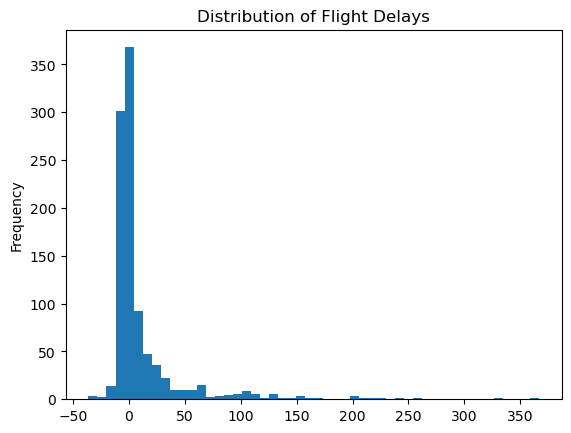

In [51]:
df["DEPARTURE_DELAY"].plot(kind="hist",bins=50,title="Distribution of Flight Delays")

<Axes: title={'center': 'Distribution of Flight Delays < 30 Min'}, ylabel='Frequency'>

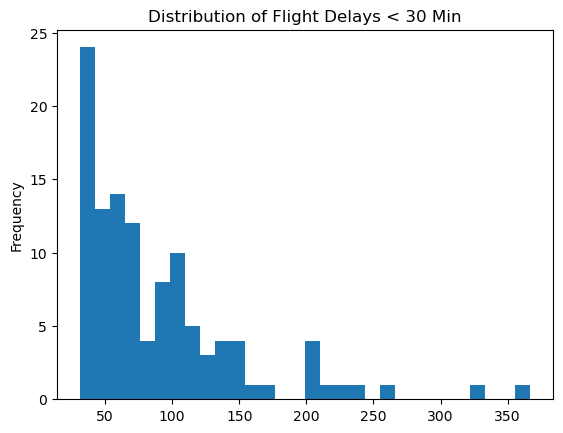

In [52]:
df.query("DEPARTURE_DELAY > 30")["DEPARTURE_DELAY"].plot(kind="hist",bins=30,title="Distribution of Flight Delays < 30 Min")

<Axes: title={'center': 'Distribution of Flight Delays between 1 & 30 Min'}, ylabel='Frequency'>

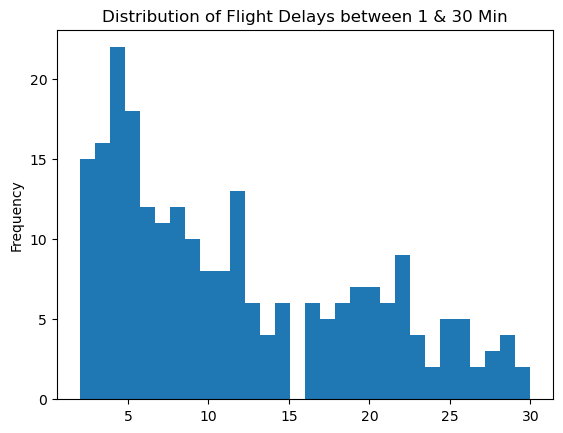

In [54]:
df.query("DEPARTURE_DELAY > 1 and DEPARTURE_DELAY< 31")["DEPARTURE_DELAY"].plot(kind="hist",bins=30,title="Distribution of Flight Delays between 1 & 30 Min")